### Carrego as bibliotecas que utilizarei:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime as datetime

### Baixar os dados de preços das ações da WEG:

In [ ]:
def dados_preçosweg():
    # Definir o intervalo de datas: de 01/01/2019 até 27/01/2024.
    start = datetime.datetime(2019, 1, 1)
    end = datetime.datetime(2024, 4, 27 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Resetar o índice para incluir a coluna de datas no DataFrame
    df.reset_index(inplace=True)

    return df

### Colocar os dados de preços em um dataframe e plotar os dados em um gráfico de linhas com duas linhas de tendência (um reta, outra curva):

[*********************100%%**********************]  1 of 1 completed


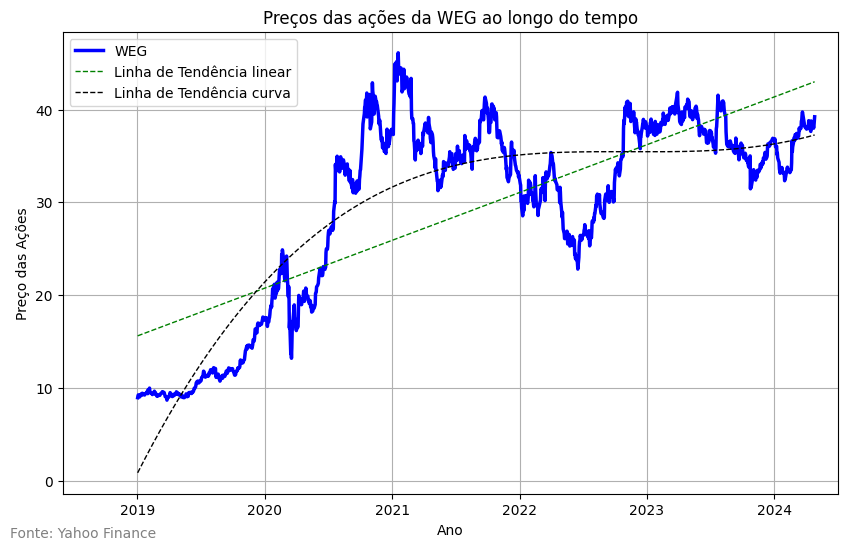

In [55]:
# Obter os dados
df = dados_preçosweg()

# Criar uma coluna de data a partir da coluna 'Date'
df['data'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('data', inplace=True)

# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
plt.plot(df.index, df['WEGE3'], label='WEG', color='blue', linewidth=2.5)

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 1)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Linha de Tendência linear', color='green', linestyle='--', linewidth=1)

coeficientes1 = np.polyfit(df['Date_numeric'], df['WEGE3'], 3)
tendencia = np.poly1d(coeficientes1)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Linha de Tendência curva', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Preços das ações da WEG ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2018-06-01'), pd.Timestamp('2024-07-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2018-01-01'), -6, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()


### Obter os dados da DRE

In [ ]:
def DRE():
    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']
    df1 = []

    # Loop para baixar a Demonstração de Resultados do Exercício da empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre = ativo.financials
        df1.append(dre.T)

    # Concatenar as Demonstrações de Resultados do Exercício em um único dataframe
    resultado = pd.concat(df1)
    resultado.reset_index(inplace=True)
    resultado.rename(columns={'index': 'Ano'}, inplace=True)
    return resultado


### Exibir os dados obtidos:

In [ ]:
# Chamar a função DRE e exibir o resultado
dre_resultado = DRE()
print(dre_resultado)

         Ano Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
0 2023-12-31                  72283524.0             0.1097      6709981000.0   
1 2022-12-31                  40135578.3             0.1647      5515876000.0   
2 2021-12-31                   8535132.7             0.1553      4847224000.0   
3 2020-12-31                  14693545.1             0.1277      3159789000.0   

  Total Unusual Items Total Unusual Items Excluding Goodwill  \
0         658920000.0                            658920000.0   
1         243689000.0                            243689000.0   
2          54959000.0                             54959000.0   
3         115063000.0                            115063000.0   

  Net Income From Continuing Operation Net Minority Interest  \
0                                       5731670000.0           
1                                       4208084000.0           
2                                       3585947000.0           
3                

In [ ]:
# Verificar se os nomes das colunas ds dados obtidos e colocados no dataframe:
print(dre_resultado.columns)

Index(['Ano', 'Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Diluted Average Shares', 'Basic Average Shares',
       'Diluted EPS', 'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Net Income', 'Minority Interests',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Special Income Charges', 'Restructuring And Mergern Acquisition',
       'Net Non Operating Interest Income 

### Ploto as informações que quero em um gráfico de linhas

         Ano  Receita Total Lucro Líquido
0 2023-12-31  32503601000.0  5731670000.0
1 2022-12-31  29904722000.0  4208084000.0
2 2021-12-31  23563338000.0  3585947000.0
3 2020-12-31  17469557000.0  2340873000.0


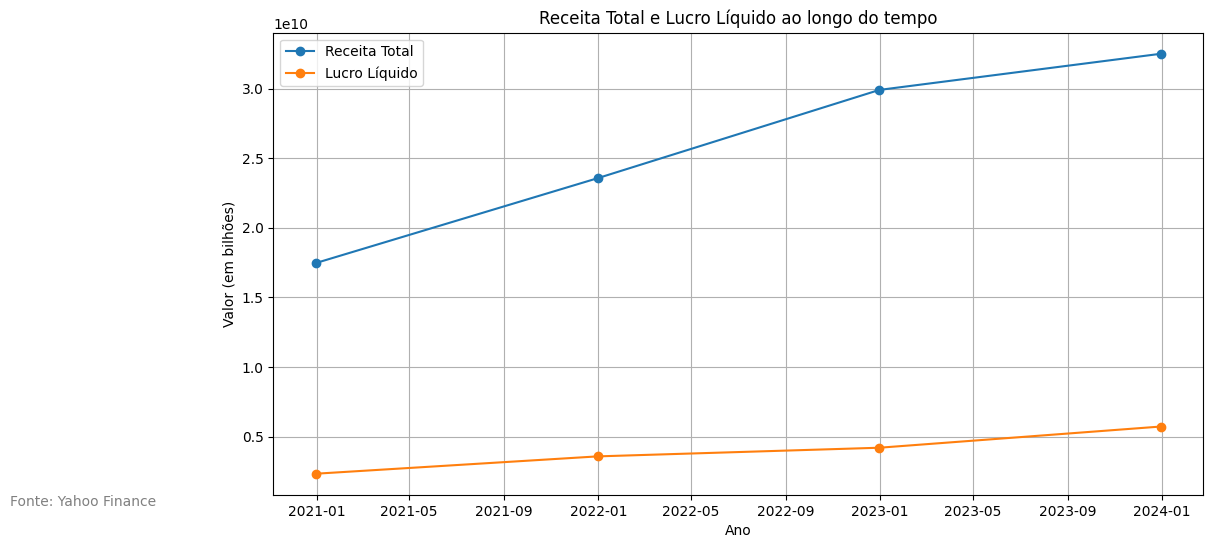

In [54]:
# Filtrar as informações que desejo (Receitas e Lucro Líquido)
dre_resultado.rename(columns={'Total Revenue': 'Receita Total', 'Net Income': 'Lucro Líquido'}, inplace=True)

# Verificar se a coluna 'Ano' foi criada corretamente
print(dre_resultado[['Ano', 'Receita Total', 'Lucro Líquido']])

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(dre_resultado['Ano'], dre_resultado['Receita Total'], label='Receita Total', marker='o')
plt.plot(dre_resultado['Ano'], dre_resultado['Lucro Líquido'], label='Lucro Líquido', marker='o')
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Receita Total e Lucro Líquido ao longo do tempo')
plt.legend()
plt.grid(True)
# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2019-12-01'), 1, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')
plt.show()